<a href="https://colab.research.google.com/github/rnanggraini10/prediction-of-students-final-grades-using-linear-regression/blob/main/Prediction_of_students'_final_grades_using_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import spearmanr
import statsmodels.api as sm
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,MinMaxScaler, StandardScaler
encode = LabelEncoder()

#Data Wrangling

##Load Dataset

In [ ]:
data = pd.read_csv('student_data.csv')
print (data)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health 

In [ ]:
data.shape

(395, 33)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [ ]:
  data.tail(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
385,MS,F,18,R,GT3,T,2,2,at_home,other,...,5,3,3,1,3,4,2,10,9,10
386,MS,F,18,R,GT3,T,4,4,teacher,at_home,...,4,4,3,2,2,5,7,6,5,6
387,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,0,7,5,0
388,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,0,7,9,8
389,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,0,6,5,0
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [ ]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


##Data Cleaning

In [ ]:
data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
print(data.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [ ]:
new_data = data.dropna()

In [ ]:
new_data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
new_data.duplicated().sum()

0

In [ ]:
new_data.shape

(395, 33)

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
new_data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


##Data Integration

<Axes: xlabel='G1', ylabel='G2'>

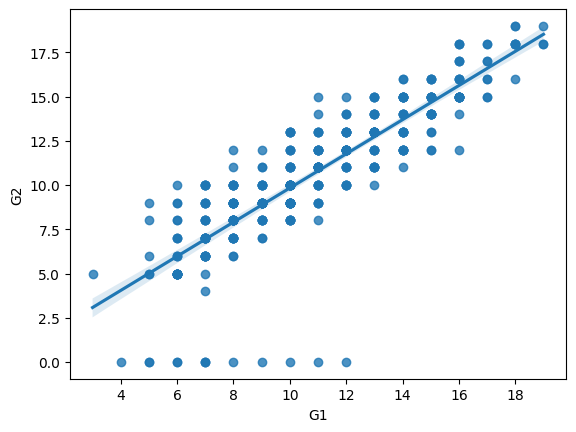

In [ ]:
sns.regplot(x="G1", y="G2", data=new_data)

<Axes: xlabel='G2', ylabel='G3'>

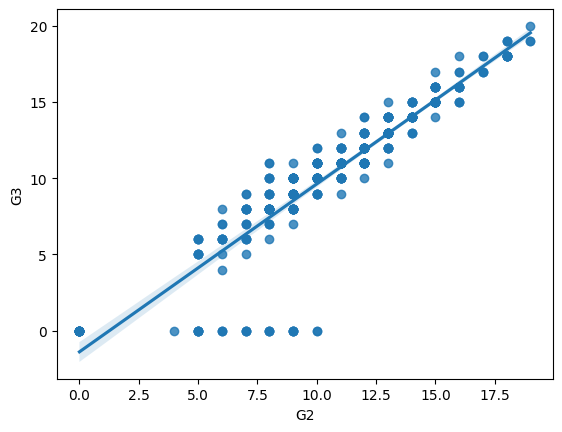

In [ ]:
sns.regplot(x="G2", y="G3", data=new_data)

<Axes: xlabel='G1', ylabel='G3'>

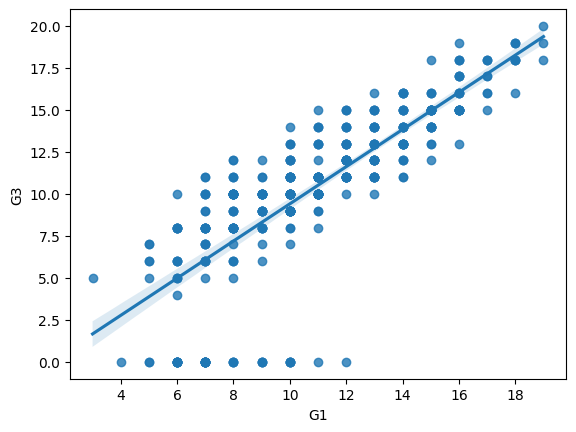

In [ ]:
sns.regplot(x="G1", y="G3", data=new_data)

<Axes: xlabel='Dalc', ylabel='Walc'>

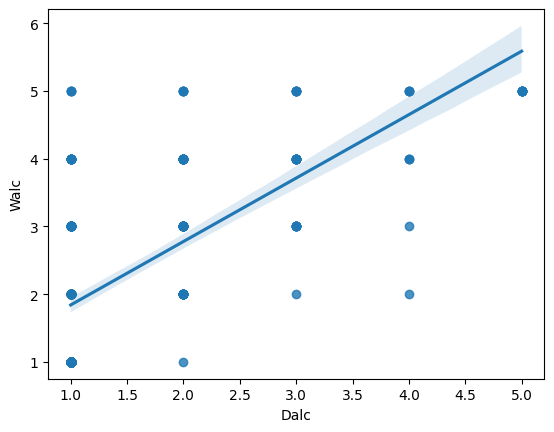

In [ ]:
sns.regplot(x="Dalc",y="Walc",data=new_data)

###Overall Health vs Grade

In [ ]:
new_data['overall_health'] = (new_data['Dalc'] + new_data['Walc'] + new_data['health']) / 3
new_data['overall_health']

0      1.666667
1      1.666667
2      2.666667
3      2.333333
4      2.666667
         ...   
390    4.333333
391    3.000000
392    3.000000
393    4.000000
394    3.666667
Name: overall_health, Length: 395, dtype: float64

[Text(0.5, 1.0, 'Overall Health vs Grade')]

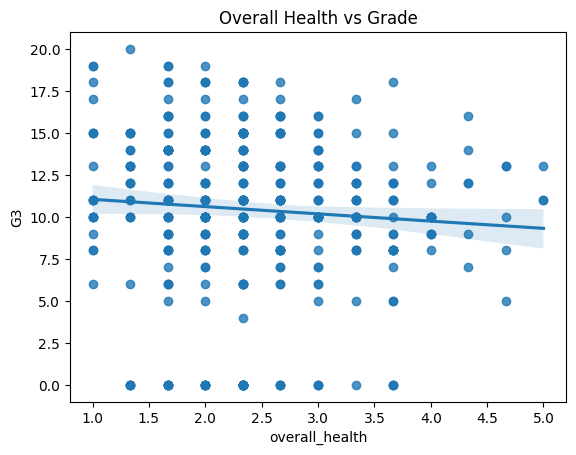

In [ ]:
sns.regplot(x='overall_health', y='G3', data=new_data).set(title = 'Overall Health vs Grade')

[Text(0.5, 1.0, 'Overall Health vs G1')]

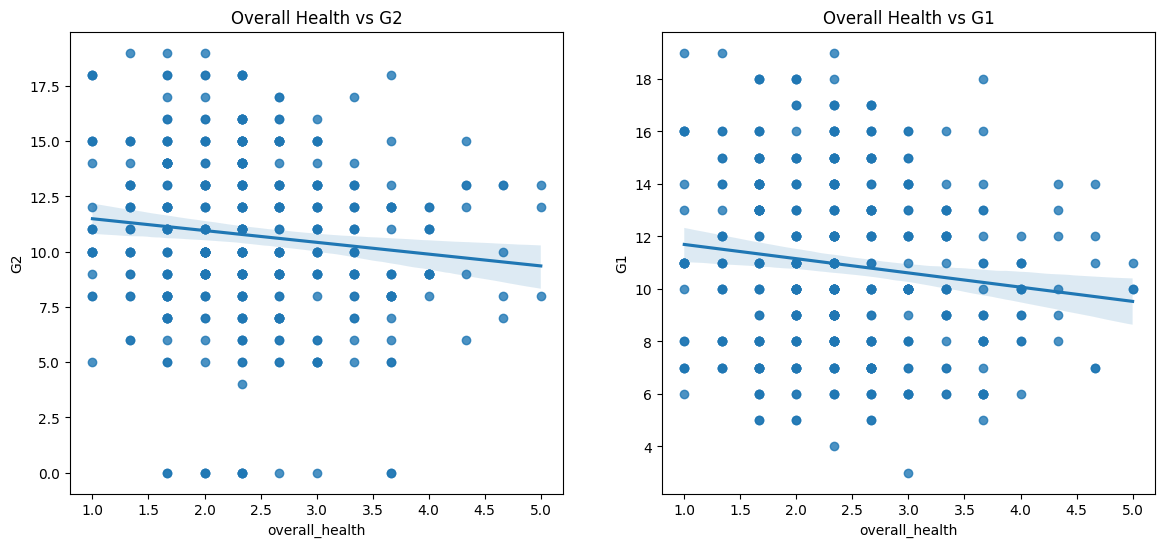

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(14,6))
sns.regplot(x='overall_health', y='G2', data=new_data, ax=axes[0])
axes[0].set(title='Overall Health vs G2')

sns.regplot(x='overall_health', y='G1', data=new_data, ax=axes[1])
axes[1].set(title='Overall Health vs G1')

###Absences vs Grade

[Text(0.5, 1.0, 'Absences vs G3')]

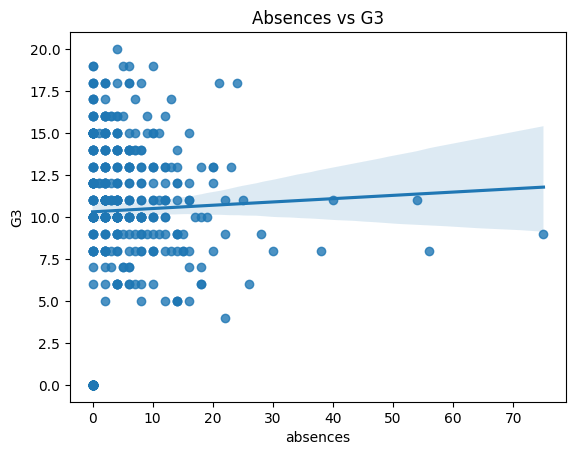

In [ ]:
sns.regplot(x='absences', y='G3', data=new_data).set(title='Absences vs G3')

[Text(0.5, 1.0, 'Absences vs G1')]

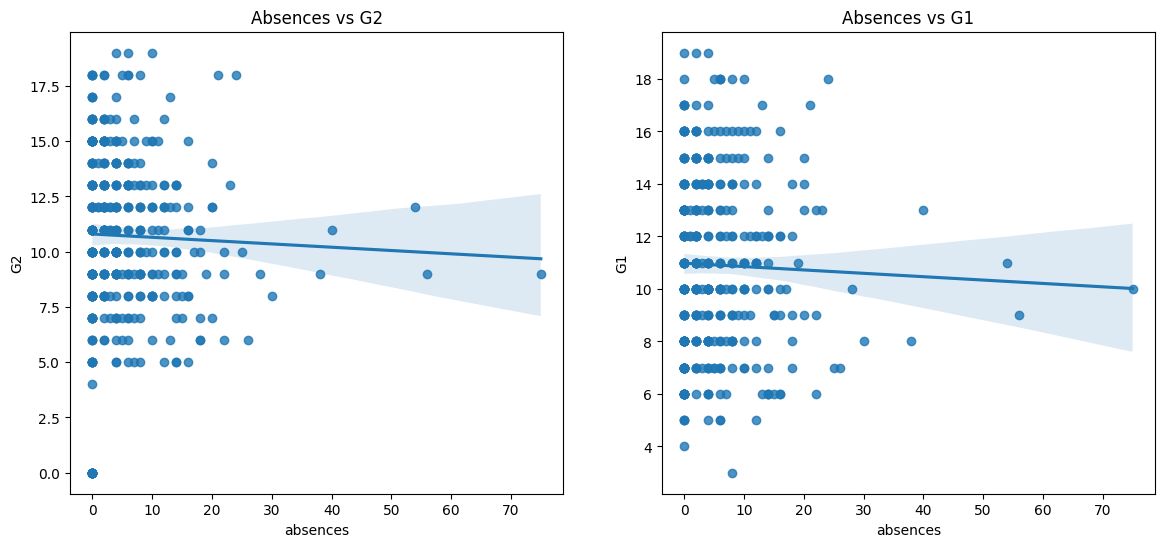

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(14,6))
sns.regplot(x='absences', y='G2', data=new_data, ax=axes[0])
axes[0].set(title='Absences vs G2')

sns.regplot(x='absences', y='G1', data=new_data, ax=axes[1])
axes[1].set(title='Absences vs G1')

<Axes: >

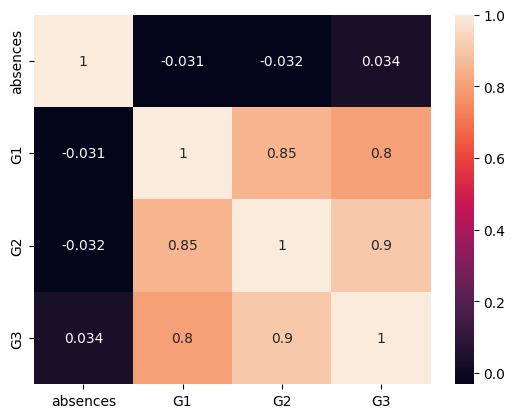

In [ ]:
sns.heatmap(new_data[['absences', 'G1', 'G2', 'G3']].corr(), annot=True)

###Age vs Grade

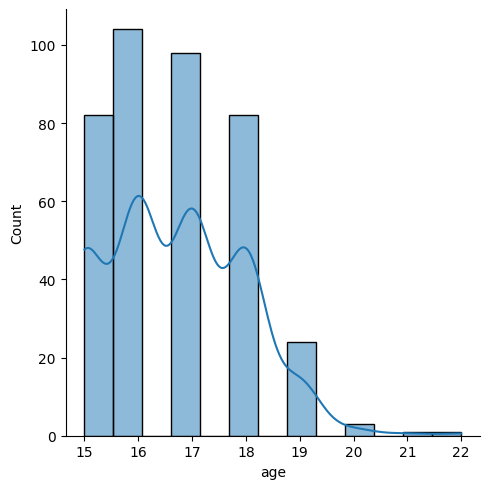

In [ ]:
sns.displot(x='age', data=new_data, kind='hist', kde=True)

In [ ]:
age_grade = new_data.groupby("age").aggregate({'G1': 'mean', 'G2': 'mean', 'G3': 'mean'})
age_grade.reset_index(inplace=True)
age_grade

,age,G1,G2,G3
0,15,11.231707,11.365854,11.256098
1,16,10.942308,11.182692,11.028846
2,17,10.897959,10.479592,10.275510
3,18,10.719512,10.134146,9.548780
4,19,10.250000,9.250000,8.208333
5,20,13.666667,13.666667,14.000000
6,21,10.000000,8.000000,7.000000
7,22,6.000000,8.000000,8.000000


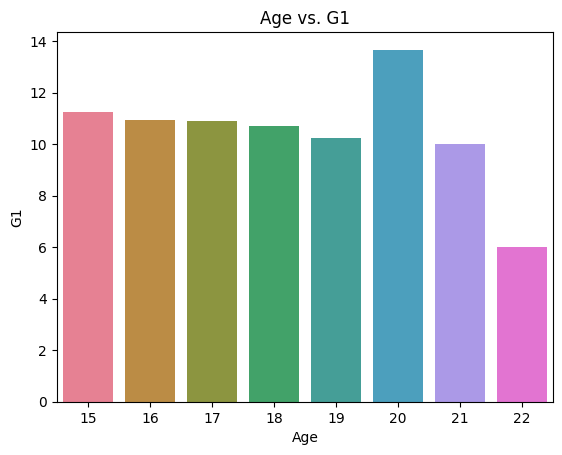

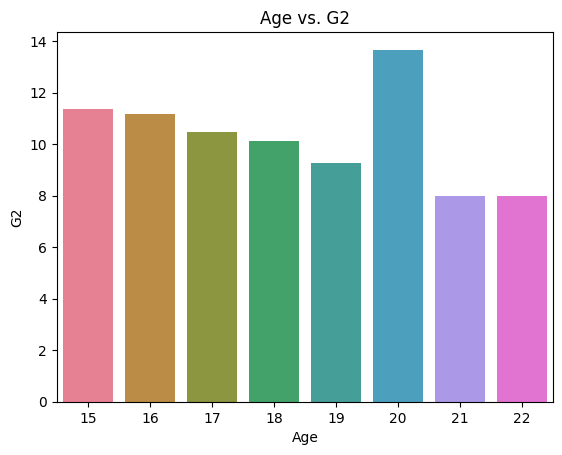

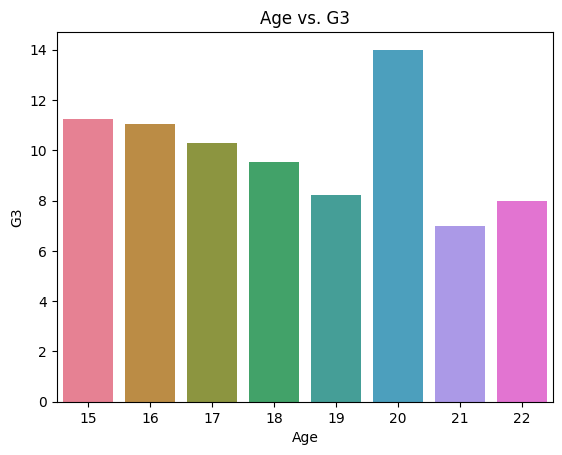

In [ ]:
grades = ['G1', 'G2', 'G3']

for grade in grades:
    sns.barplot(data=age_grade, x='age', y=grade, palette='husl').set(xlabel='Age', ylabel=grade, title=f'Age vs. {grade}');
    plt.show();

###Time Productivity vs Grade

<Axes: xlabel='time_productivity', ylabel='G3'>

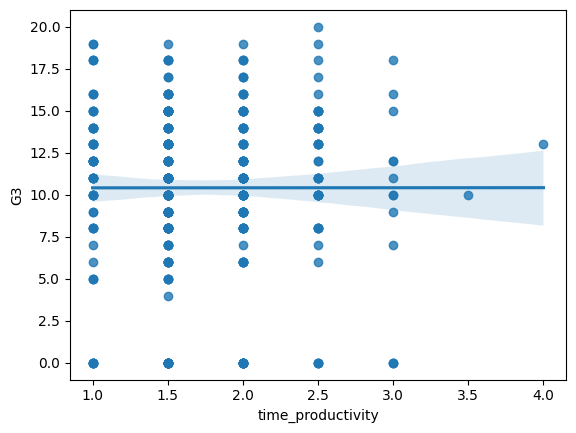

In [ ]:
new_data['time_productivity'] = (new_data['traveltime'] +  new_data['studytime']) / 2
sns.regplot(x='time_productivity', y='G3', data=new_data)

<Axes: xlabel='studytime', ylabel='G3'>

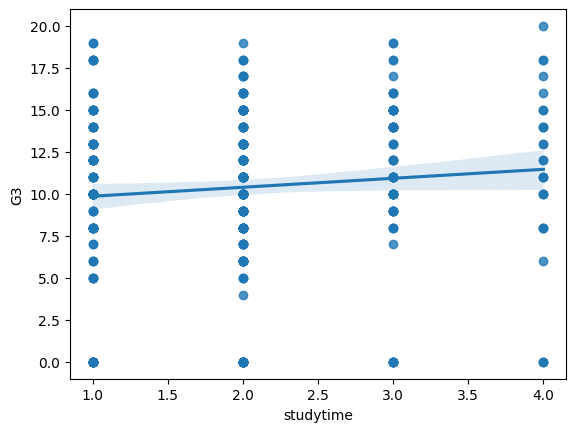

In [ ]:
sns.regplot(x='studytime', y='G3', data=new_data)

<Axes: xlabel='traveltime', ylabel='G3'>

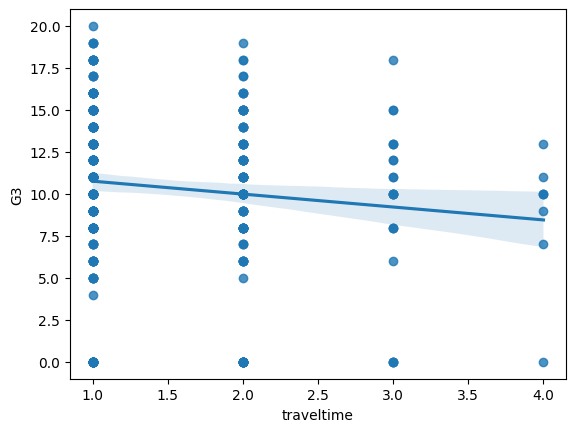

In [ ]:
sns.regplot(x='traveltime', y='G3', data=new_data)

###Mother Job vs Grade

In [ ]:
MotherJop_Edu = new_data.groupby("Mjob").aggregate({"Medu": "mean"})
MotherJop_Edu.reset_index(inplace=True)
MotherJop_Edu.sort_values(by='Medu', ascending=False, inplace=True)

In [ ]:
MotherJop_Edu

,Mjob,Medu
4,teacher,3.948276
1,health,3.647059
3,services,2.844660
2,other,2.404255
0,at_home,1.711864


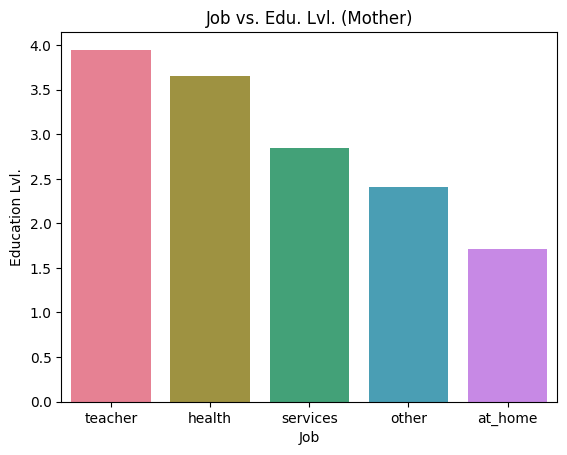

In [ ]:
sns.barplot(x='Mjob', y='Medu', data=MotherJop_Edu , palette='husl').set(xlabel='Job', ylabel='Education Lvl.', title='Job vs. Edu. Lvl. (Mother)');

###Father Job vs Grade

In [ ]:
FatherJop_Edu = new_data.groupby("Fjob").aggregate({"Fedu": "mean"})
FatherJop_Edu.reset_index(inplace=True)
FatherJop_Edu.sort_values(by='Fedu', ascending=False, inplace=True)

In [ ]:
FatherJop_Edu

,Fjob,Fedu
4,teacher,3.862069
1,health,3.333333
3,services,2.558559
0,at_home,2.350000
2,other,2.271889


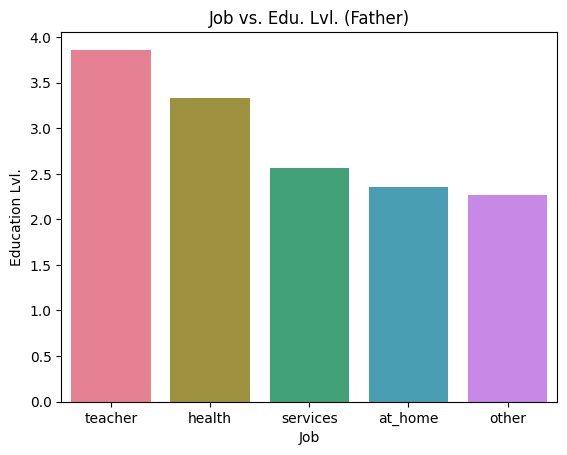

In [ ]:
sns.barplot(x='Fjob', y='Fedu', data=FatherJop_Edu ,palette='husl').set(xlabel='Job', ylabel='Education Lvl.', title='Job vs. Edu. Lvl. (Father)');

###Job vs Grade

####Mother Job vs Grade

In [ ]:
MotherJop_Grade = new_data.groupby('Mjob').aggregate({'G3':'mean'}).reset_index()
MotherJop_Grade

,Mjob,G3
0,at_home,9.152542
1,health,12.147059
2,other,9.822695
3,services,11.019417
4,teacher,11.051724


[Text(0.5, 0, 'Job'),
 Text(0, 0.5, 'G3'),
 Text(0.5, 1.0, 'Job vs. Grade (Mother)')]

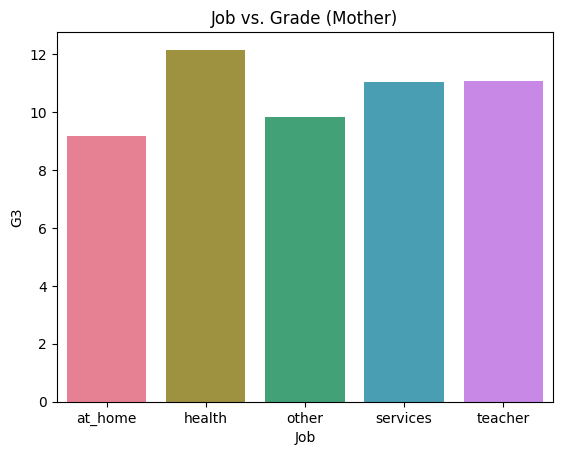

In [ ]:
sns.barplot(x = 'Mjob' , y='G3' , palette='husl' , data = MotherJop_Grade).set(xlabel='Job', ylabel='G3', title='Job vs. Grade (Mother)')

####Father Job vs Grade

In [ ]:
FatherJop_Grade = new_data.groupby('Fjob').aggregate({'G3':'mean'}).reset_index()
FatherJop_Grade

,Fjob,G3
0,at_home,10.150000
1,health,11.611111
2,other,10.193548
3,services,10.297297
4,teacher,11.965517


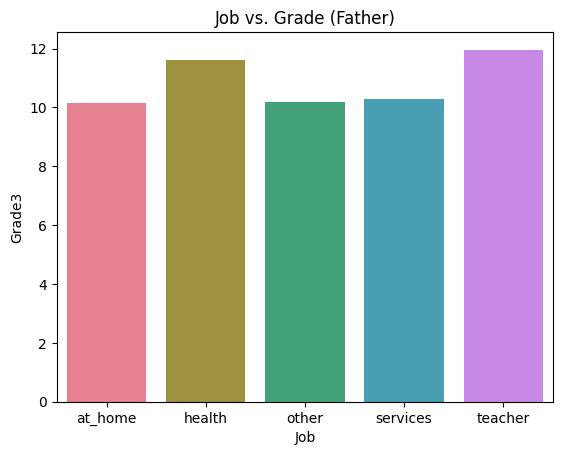

In [ ]:
sns.barplot(x='Fjob', y='G3', data=FatherJop_Grade , palette='husl').set(xlabel='Job', ylabel='Grade3', title='Job vs. Grade (Father)');

###Family Size vs Grade

In [ ]:
Family_size_grade = new_data.groupby("famsize").aggregate({"G1": "mean", "G2": "mean", "G3": "mean"}).reset_index()
Family_size_grade

,famsize,G1,G2,G3
0,GT3,10.758007,10.519573,10.177936
1,LE3,11.280702,11.192982,11.000000


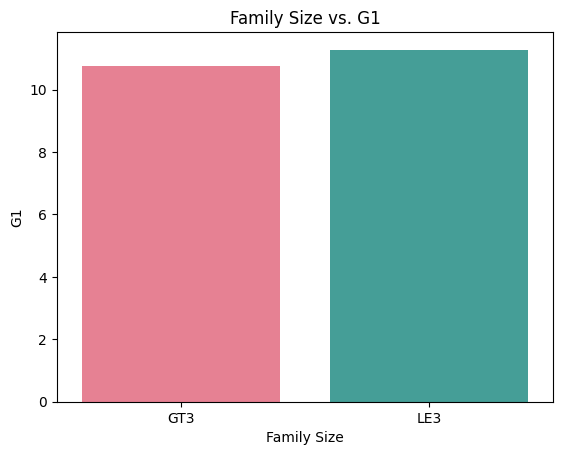

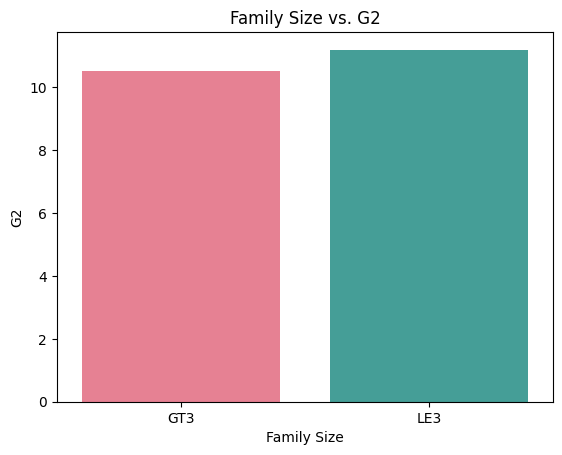

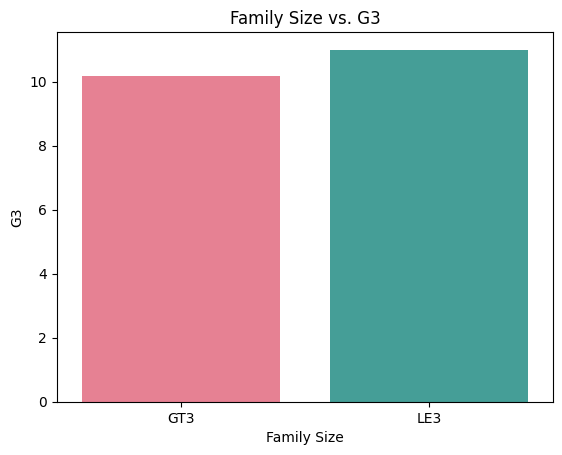

In [ ]:
for grade in grades:
    sns.barplot(data=Family_size_grade, x='famsize', y=grade, palette='husl').set(xlabel='Family Size', ylabel=grade, title=f'Family Size vs. {grade}');
    plt.show();

###Activities vs Grade

In [ ]:
act_gr = new_data.groupby("activities").aggregate({"G1": "mean", "G2": "mean", "G3": "mean"}).reset_index()
act_gr

,activities,G1,G2,G3
0,no,10.716495,10.520619,10.340206
1,yes,11.094527,10.900498,10.487562


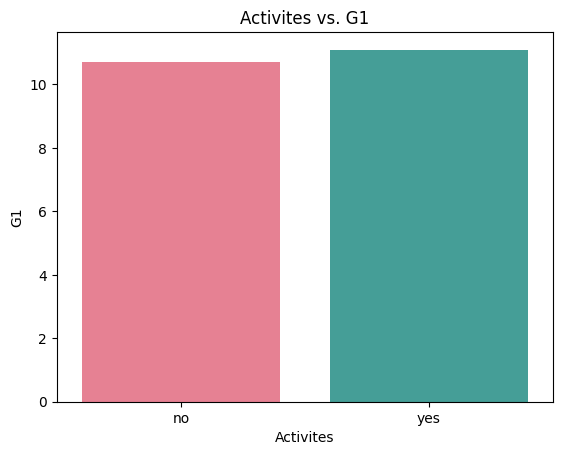

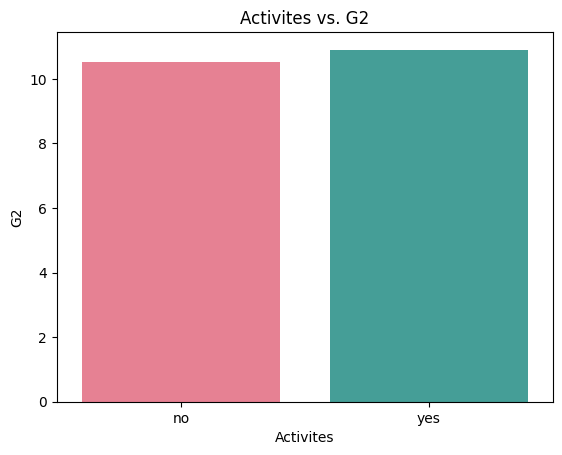

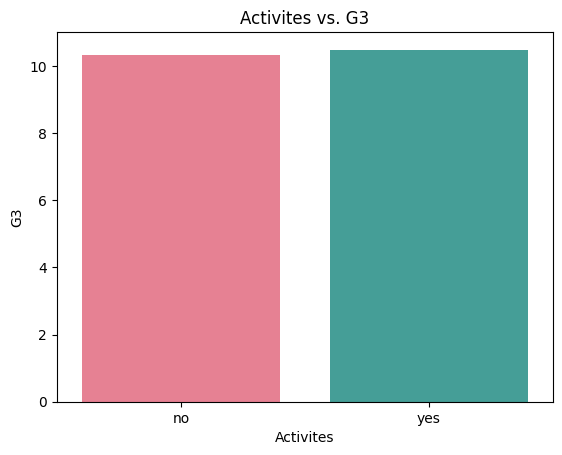

In [ ]:
for grade in grades:
    sns.barplot(data=act_gr, x='activities', y=grade, palette='husl').set(xlabel='Activites', ylabel=grade, title=f'Activites vs. {grade}');
    plt.show()

###Go Out vs Grade

In [ ]:
out_gr = new_data.groupby("goout").aggregate({"G1": "mean", "G2": "mean", "G3": "mean"}).reset_index()
out_gr

,goout,G1,G2,G3
0,1,11.130435,10.782609,9.869565
1,2,11.368932,11.456311,11.194175
2,3,11.276923,11.053846,10.961538
3,4,10.430233,10.058140,9.651163
4,5,9.792453,9.471698,9.037736


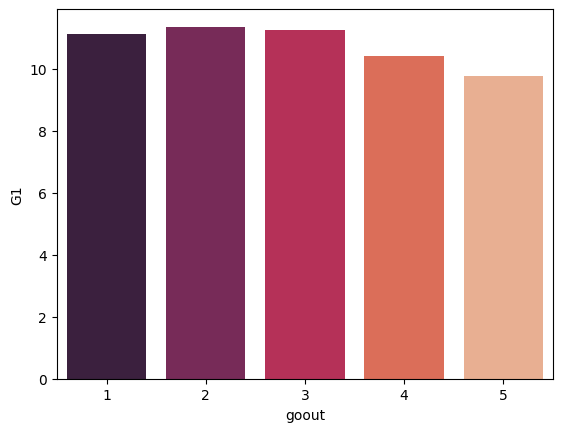

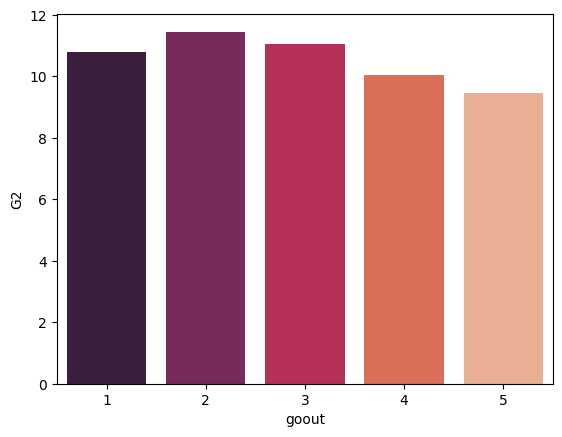

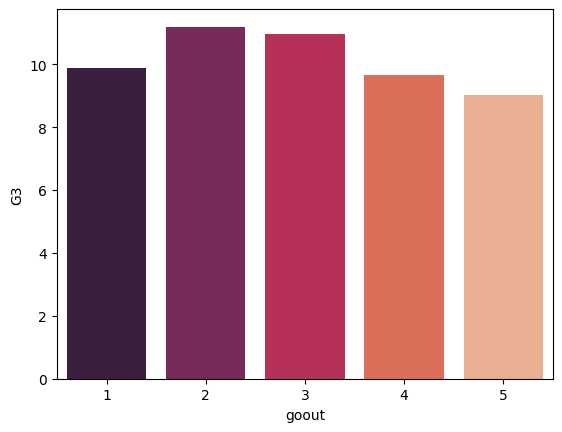

In [ ]:
for grade in grades:
    sns.barplot(data=out_gr, x='goout', y=grade, palette='rocket')
    plt.show()

##Data Transformation

In [ ]:
df = new_data.copy()
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,overall_health,time_productivity
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,1.666667,2.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,1.666667,1.5
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,2.666667,1.5
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,2.333333,2.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,2.666667,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,4,4,5,4,11,9,9,9,4.333333,1.5
391,MS,M,17,U,LE3,T,3,1,services,services,...,5,3,4,2,3,14,16,16,3.000000,1.5
392,MS,M,21,R,GT3,T,1,1,other,other,...,3,3,3,3,3,10,8,7,3.000000,1.0
393,MS,M,18,R,LE3,T,3,2,services,other,...,1,3,4,5,0,11,12,10,4.000000,2.0


In [ ]:
#transformasi(encoding)
df['school'] = encode.fit_transform(new_data['school'].values)
df['sex'] = encode.fit_transform(new_data['sex'].values)
df['Pstatus'] = encode.fit_transform(new_data['Pstatus'].values)
df['address'] = encode.fit_transform(new_data['address'].values)
df['famsize'] = encode.fit_transform(new_data['famsize'].values)
df['Mjob'] = encode.fit_transform(new_data['Mjob'].values)
df['Fjob'] = encode.fit_transform(new_data['Fjob'].values)
df['reason'] = encode.fit_transform(new_data['reason'].values)
df['guardian'] = encode.fit_transform(new_data['guardian'].values)
df['schoolsup'] = encode.fit_transform(new_data['schoolsup'].values)
df['famsup'] = encode.fit_transform(new_data['famsup'].values)
df['paid'] = encode.fit_transform(new_data['paid'].values)
df['activities'] = encode.fit_transform(new_data['activities'].values)
df['nursery'] = encode.fit_transform(new_data['nursery'].values)
df['higher'] = encode.fit_transform(new_data['higher'].values)
df['internet'] = encode.fit_transform(new_data['internet'].values)
df['romantic'] = encode.fit_transform(new_data['romantic'].values)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   school             395 non-null    int64  
 1   sex                395 non-null    int64  
 2   age                395 non-null    int64  
 3   address            395 non-null    int64  
 4   famsize            395 non-null    int64  
 5   Pstatus            395 non-null    int64  
 6   Medu               395 non-null    int64  
 7   Fedu               395 non-null    int64  
 8   Mjob               395 non-null    int64  
 9   Fjob               395 non-null    int64  
 10  reason             395 non-null    int64  
 11  guardian           395 non-null    int64  
 12  traveltime         395 non-null    int64  
 13  studytime          395 non-null    int64  
 14  failures           395 non-null    int64  
 15  schoolsup          395 non-null    int64  
 16  famsup             395 non

In [ ]:
print(df)

     school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0         0    0   18        1        0        0     4     4     0     4  ...   
1         0    0   17        1        0        1     1     1     0     2  ...   
2         0    0   15        1        1        1     1     1     0     2  ...   
3         0    0   15        1        0        1     4     2     1     3  ...   
4         0    0   16        1        0        1     3     3     2     2  ...   
..      ...  ...  ...      ...      ...      ...   ...   ...   ...   ...  ...   
390       1    1   20        1        1        0     2     2     3     3  ...   
391       1    1   17        1        1        1     3     1     3     3  ...   
392       1    1   21        0        0        1     1     1     2     2  ...   
393       1    1   18        0        1        1     3     2     3     2  ...   
394       1    1   19        1        1        1     1     1     2     0  ...   

     goout  Dalc  Walc  hea

In [ ]:
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,overall_health,time_productivity
0,0,0,18,1,0,0,4,4,0,4,...,4,1,1,3,6,5,6,6,1.666667,2.0
1,0,0,17,1,0,1,1,1,0,2,...,3,1,1,3,4,5,5,6,1.666667,1.5
2,0,0,15,1,1,1,1,1,0,2,...,2,2,3,3,10,7,8,10,2.666667,1.5
3,0,0,15,1,0,1,4,2,1,3,...,2,1,1,5,2,15,14,15,2.333333,2.0
4,0,0,16,1,0,1,3,3,2,2,...,2,1,2,5,4,6,10,10,2.666667,1.5
5,0,1,16,1,1,1,4,3,3,2,...,2,1,2,5,10,15,15,15,2.666667,1.5
6,0,1,16,1,1,1,2,2,2,2,...,4,1,1,3,0,12,12,11,1.666667,1.5
7,0,0,17,1,0,0,4,4,2,4,...,4,1,1,1,6,6,5,6,1.000000,2.0
8,0,1,15,1,1,0,3,2,3,2,...,2,1,1,1,0,16,18,19,1.000000,1.5
9,0,1,15,1,0,1,3,4,2,2,...,1,1,1,5,0,14,15,15,2.333333,1.5


In [ ]:
df.tail(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,overall_health,time_productivity
385,1,0,18,0,0,1,2,2,0,2,...,3,1,3,4,2,10,9,10,2.666667,2.5
386,1,0,18,0,0,1,4,4,4,0,...,3,2,2,5,7,6,5,6,3.000000,2.0
387,1,0,19,0,0,1,2,3,3,2,...,2,1,2,5,0,7,5,0,2.666667,2.0
388,1,0,18,1,1,1,3,1,4,3,...,4,1,1,1,0,7,9,8,1.000000,1.5
389,1,0,18,1,0,1,1,1,2,2,...,1,1,1,5,0,6,5,0,2.333333,2.0
390,1,1,20,1,1,0,2,2,3,3,...,4,4,5,4,11,9,9,9,4.333333,1.5
391,1,1,17,1,1,1,3,1,3,3,...,5,3,4,2,3,14,16,16,3.000000,1.5
392,1,1,21,0,0,1,1,1,2,2,...,3,3,3,3,3,10,8,7,3.000000,1.0
393,1,1,18,0,1,1,3,2,3,2,...,1,3,4,5,0,11,12,10,4.000000,2.0
394,1,1,19,1,1,1,1,1,2,0,...,3,3,3,5,5,8,9,9,3.666667,1.0


In [ ]:
df.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,overall_health,time_productivity
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.116456,0.473418,16.696203,0.777215,0.288608,0.896203,2.749367,2.521519,2.169620,2.281013,...,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,2.442194,1.741772
std,0.321177,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.088201,1.227473,0.863542,...,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,0.842818,0.517856
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,16.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,2.000000,1.500000
50%,0.000000,0.000000,17.000000,1.000000,0.000000,1.000000,3.000000,2.000000,2.000000,2.000000,...,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,2.333333,1.500000
75%,0.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000,...,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,3.000000,2.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,5.000000,4.000000


#Exploratory Data Analysis

array([[<Axes: title={'center': 'school'}>,
        <Axes: title={'center': 'sex'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'address'}>,
        <Axes: title={'center': 'famsize'}>,
        <Axes: title={'center': 'Pstatus'}>],
       [<Axes: title={'center': 'Medu'}>,
        <Axes: title={'center': 'Fedu'}>,
        <Axes: title={'center': 'Mjob'}>,
        <Axes: title={'center': 'Fjob'}>,
        <Axes: title={'center': 'reason'}>,
        <Axes: title={'center': 'guardian'}>],
       [<Axes: title={'center': 'traveltime'}>,
        <Axes: title={'center': 'studytime'}>,
        <Axes: title={'center': 'failures'}>,
        <Axes: title={'center': 'schoolsup'}>,
        <Axes: title={'center': 'famsup'}>,
        <Axes: title={'center': 'paid'}>],
       [<Axes: title={'center': 'activities'}>,
        <Axes: title={'center': 'nursery'}>,
        <Axes: title={'center': 'higher'}>,
        <Axes: title={'center': 'internet'}>,
        <Axes: title={'center

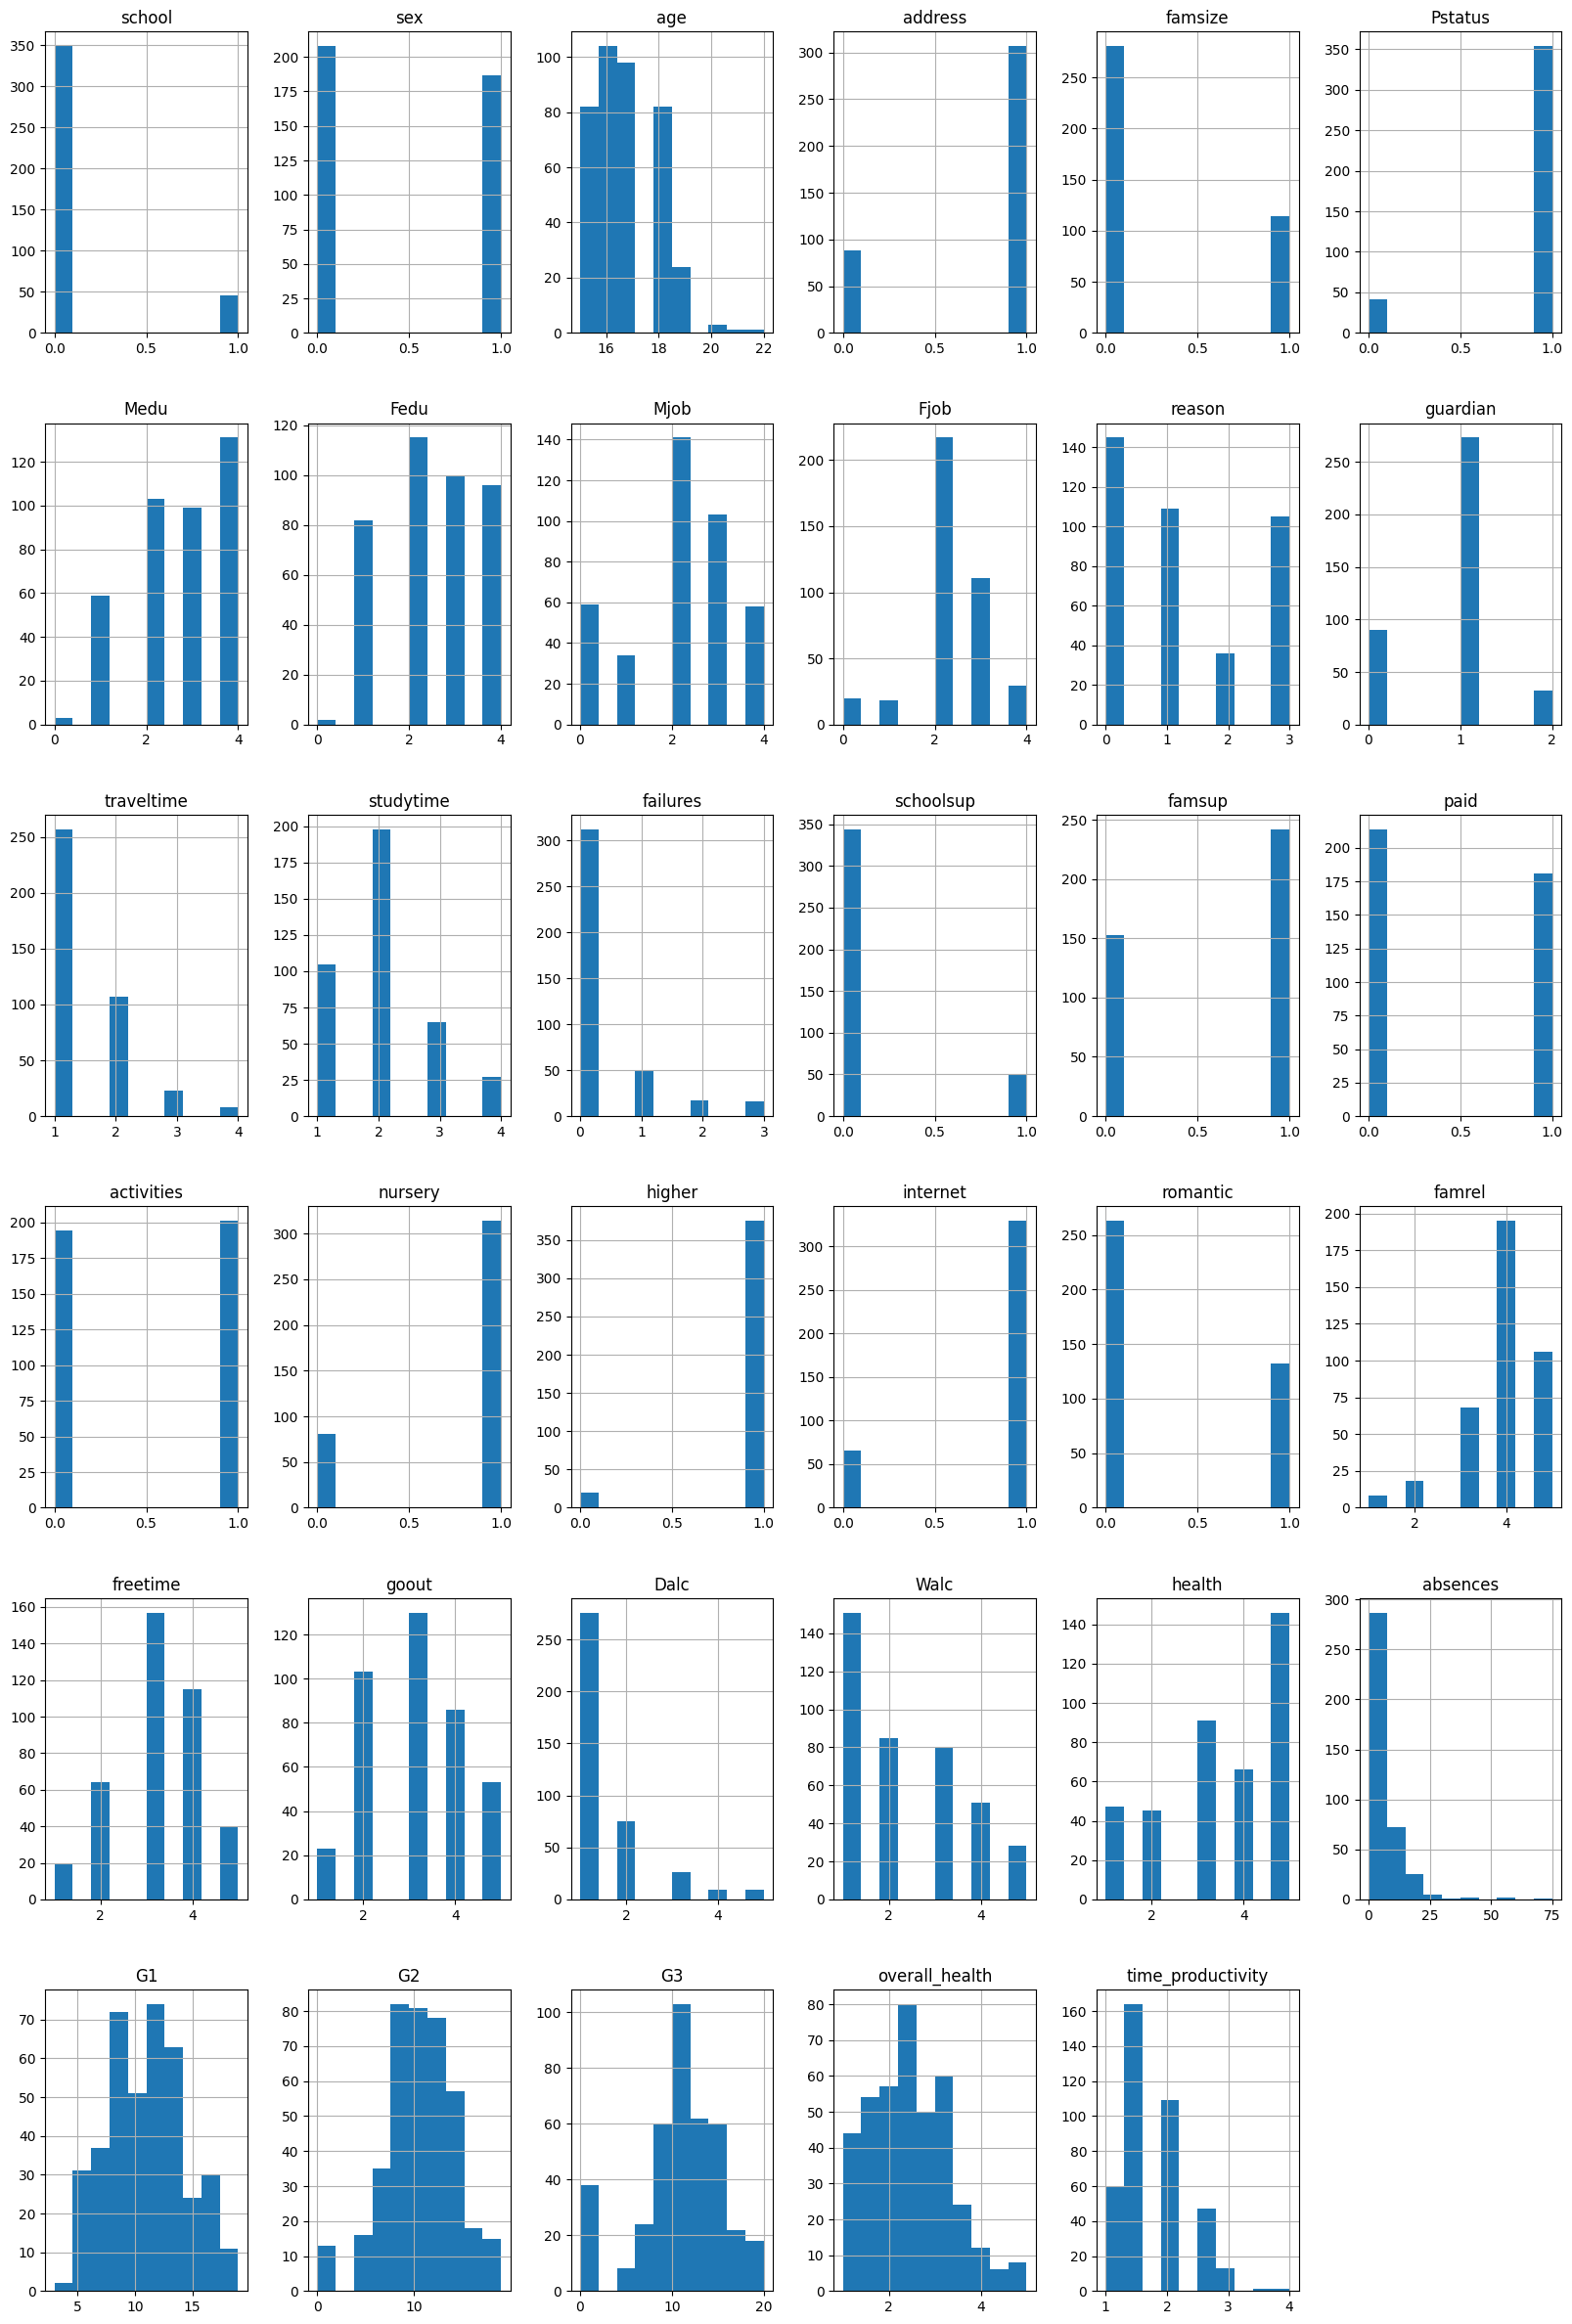

In [ ]:
df.hist(figsize= (20,30))

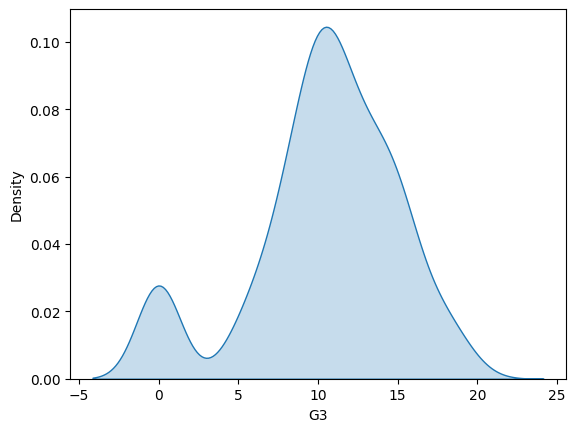

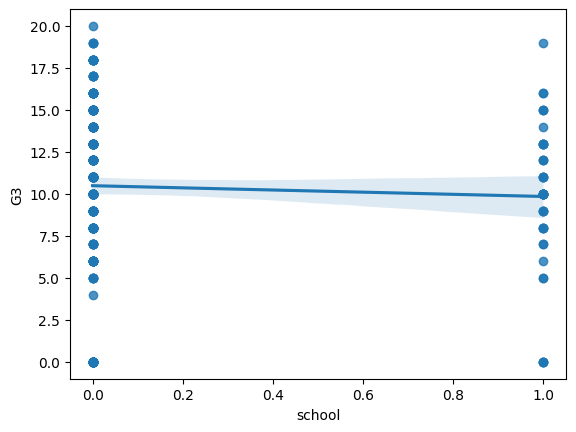

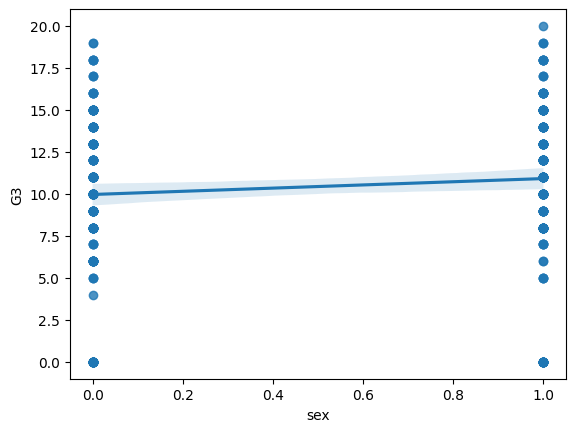

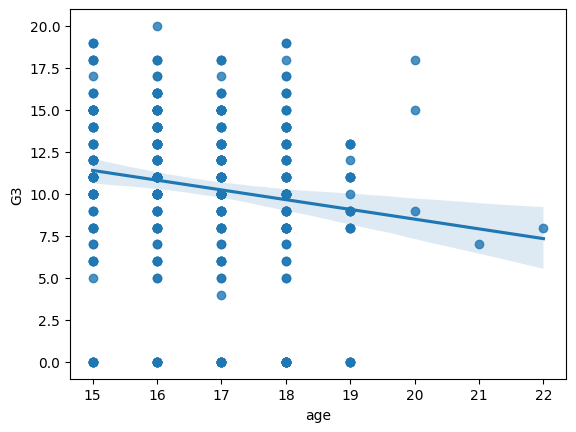

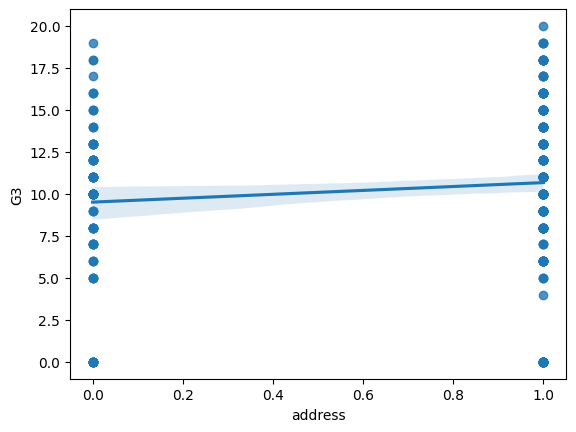

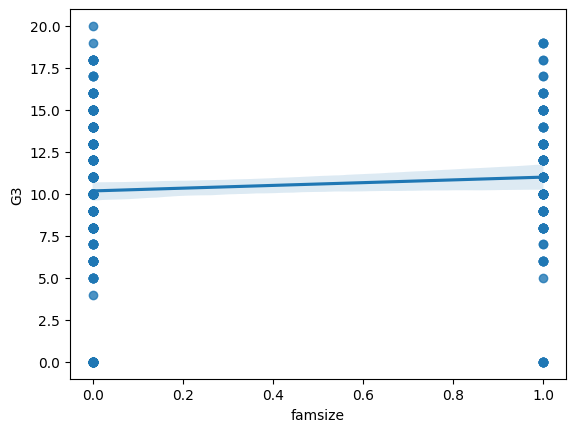

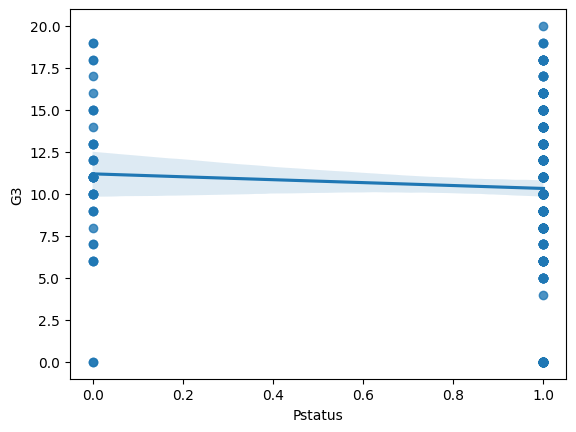

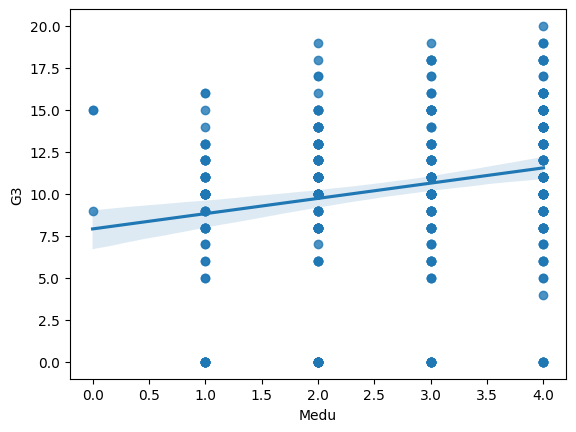

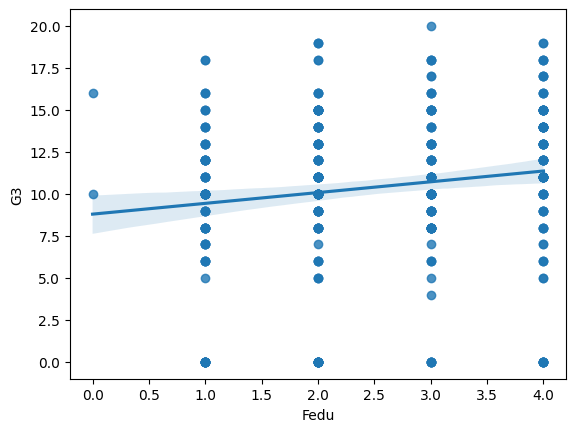

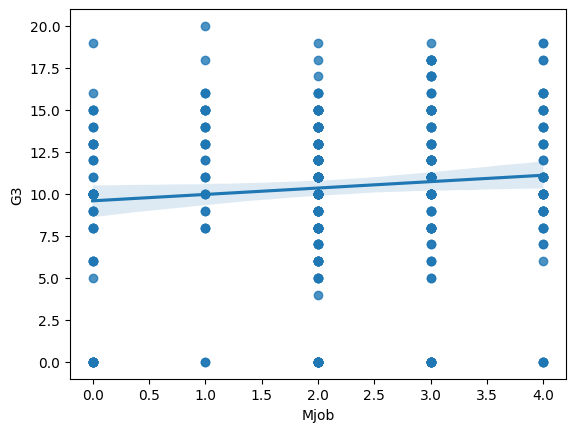

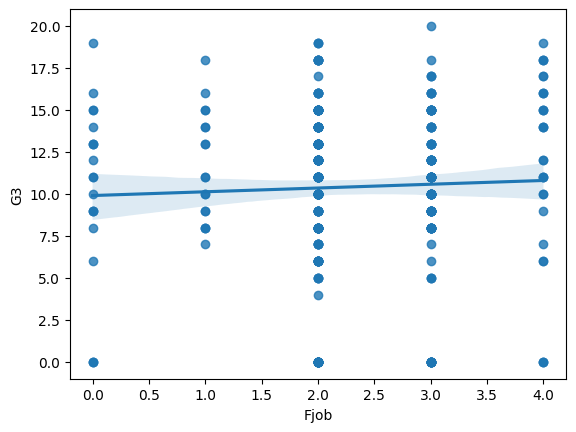

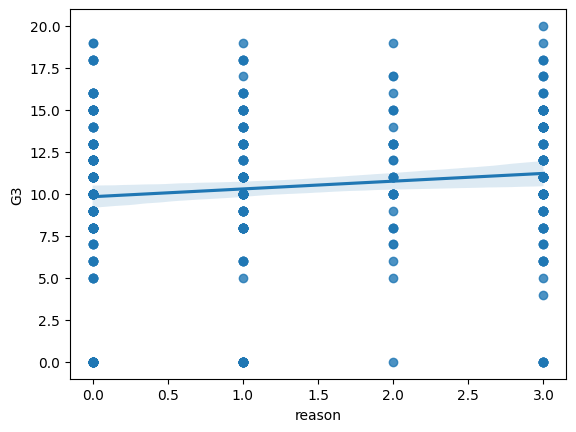

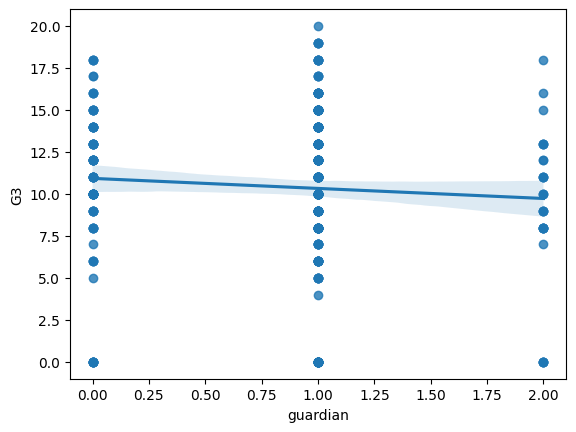

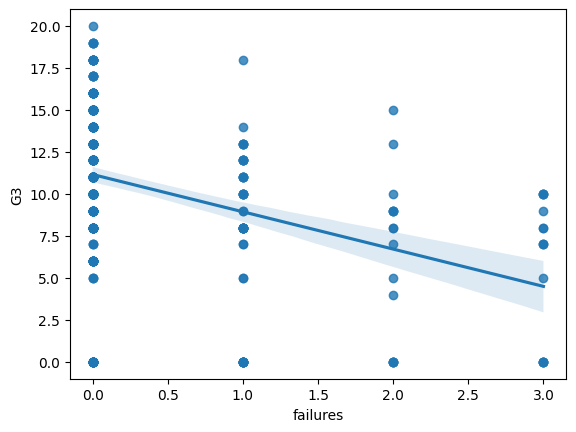

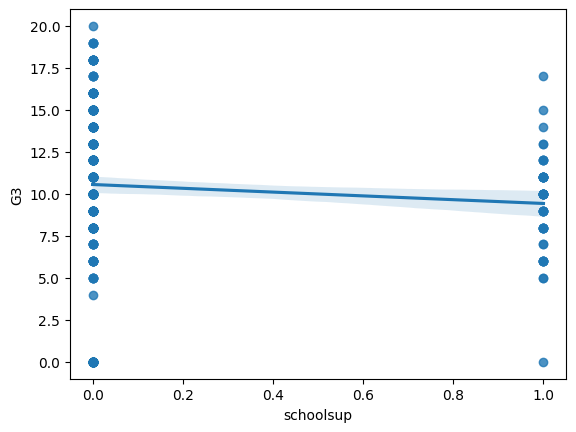

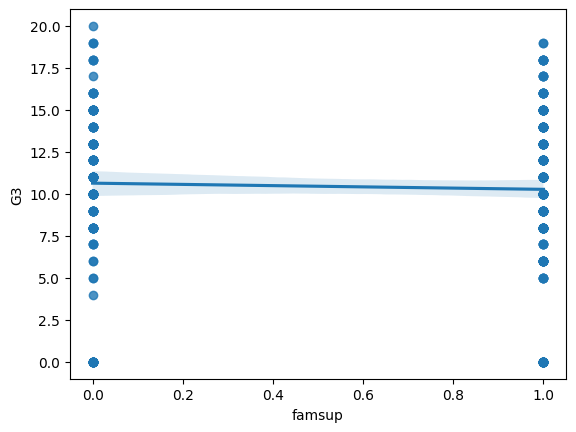

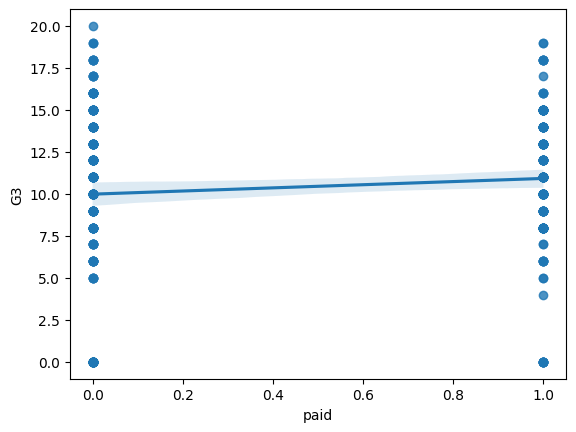

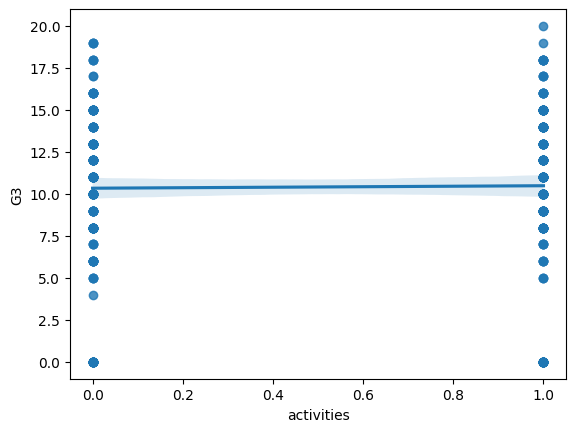

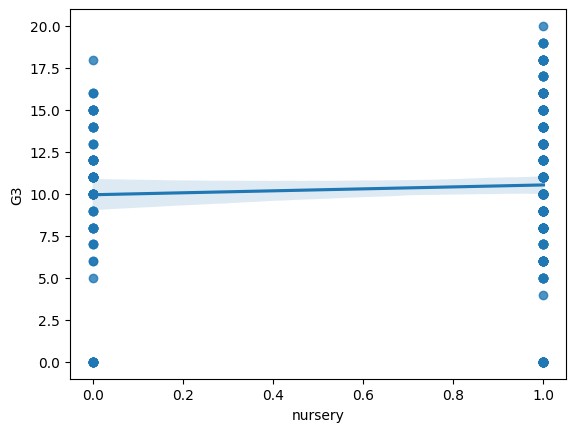

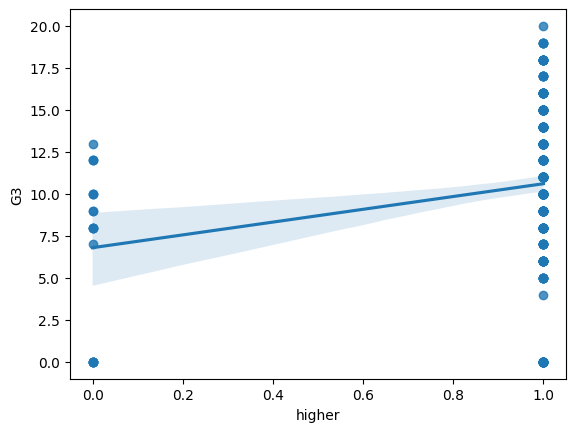

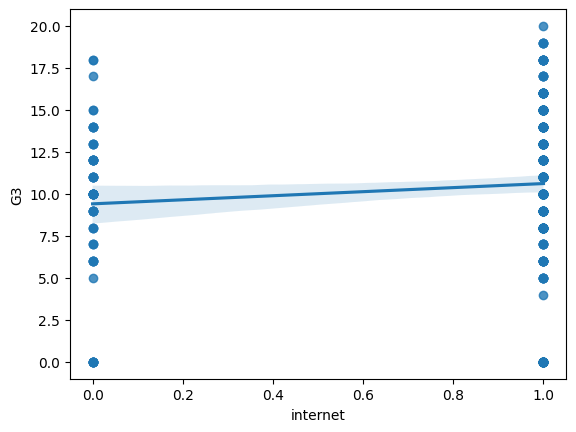

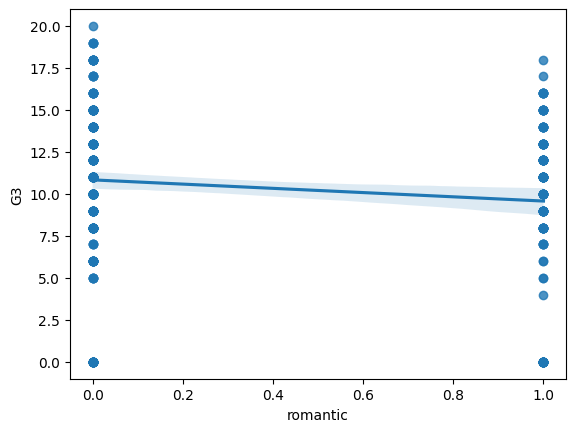

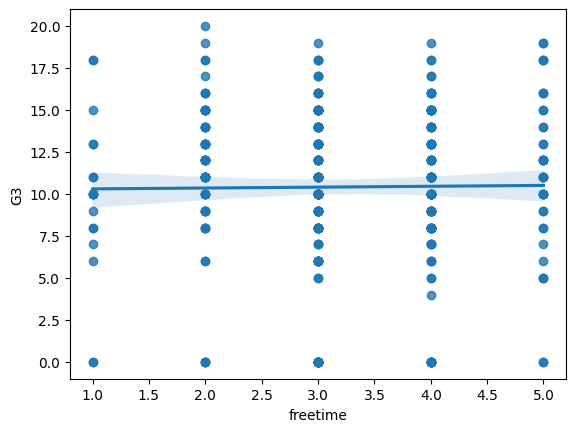

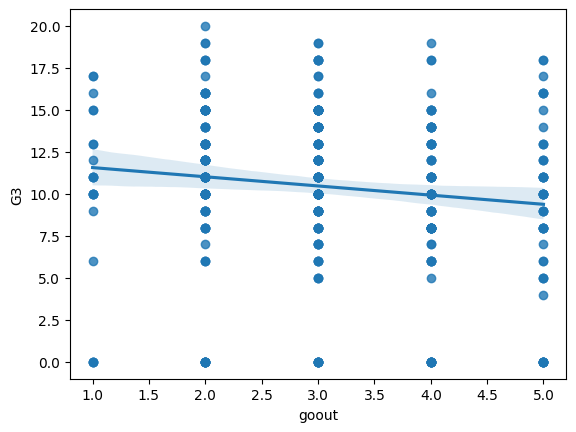

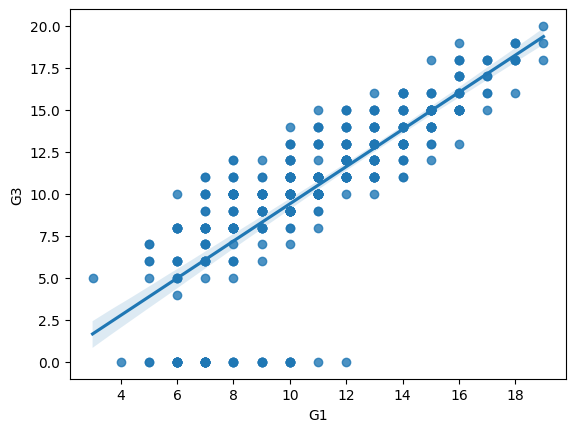

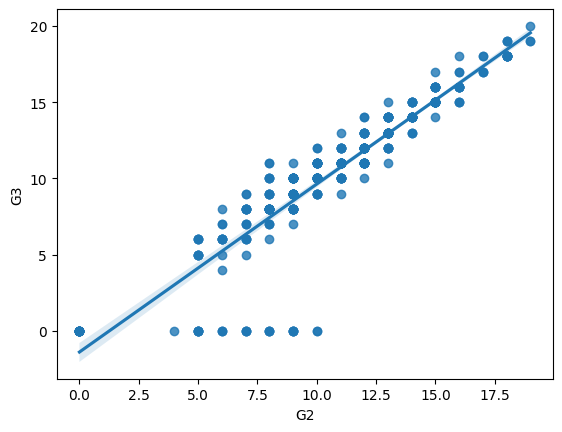

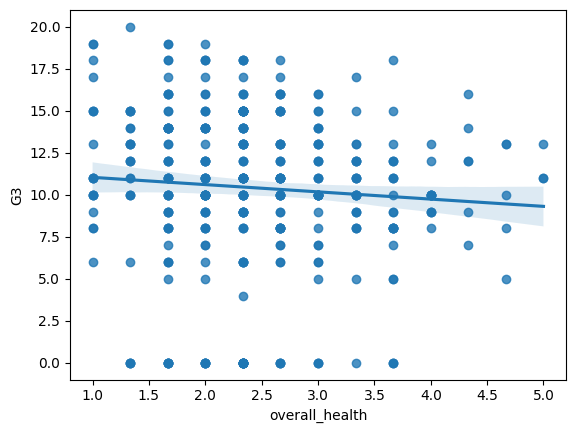

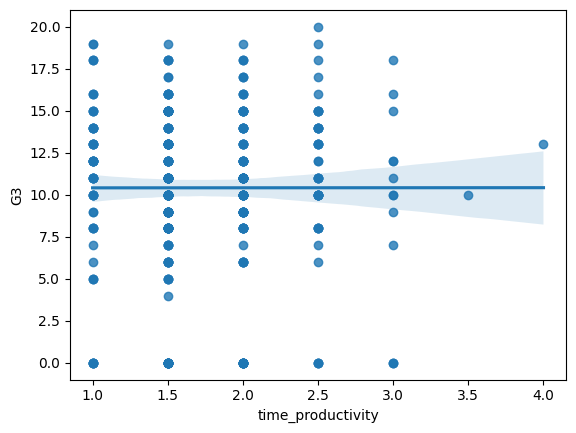

In [ ]:
# Kernel density estimate plot
sns.kdeplot(data=df['G3'], fill=True)
plt.show()

# Independent variables
columns = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian',
            'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
           'higher', 'internet', 'romantic', 'freetime', 'goout','G1','G2','overall_health', 'time_productivity']

# Scatter plots with lines of best fit
for column in columns:
    sns.regplot(x=df[column], y=df['G3'])
    plt.show()

In [ ]:
corr_matrix= df.corr()
print(corr_matrix)

                     school       sex       age   address   famsize   Pstatus  \
school             1.000000 -0.012286  0.377610 -0.279797  0.064866  0.045923   
sex               -0.012286  1.000000 -0.028606 -0.028504  0.089862  0.023443   
age                0.377610 -0.028606  1.000000 -0.146722  0.037847  0.029598   
address           -0.279797 -0.028504 -0.146722  1.000000  0.072472 -0.042572   
famsize            0.064866  0.089862  0.037847  0.072472  1.000000 -0.149612   
Pstatus            0.045923  0.023443  0.029598 -0.042572 -0.149612  1.000000   
Medu              -0.133333  0.078228 -0.163658  0.138804 -0.043068 -0.123565   
Fedu              -0.079807  0.034878 -0.163438  0.072178 -0.058879 -0.088730   
Mjob              -0.056670  0.191421 -0.069104  0.108818  0.071386 -0.054476   
Fjob               0.018974  0.084957 -0.035191 -0.001911 -0.084448  0.033892   
reason            -0.090010 -0.095867 -0.015337 -0.047891 -0.019212 -0.003553   
guardian           0.011109 

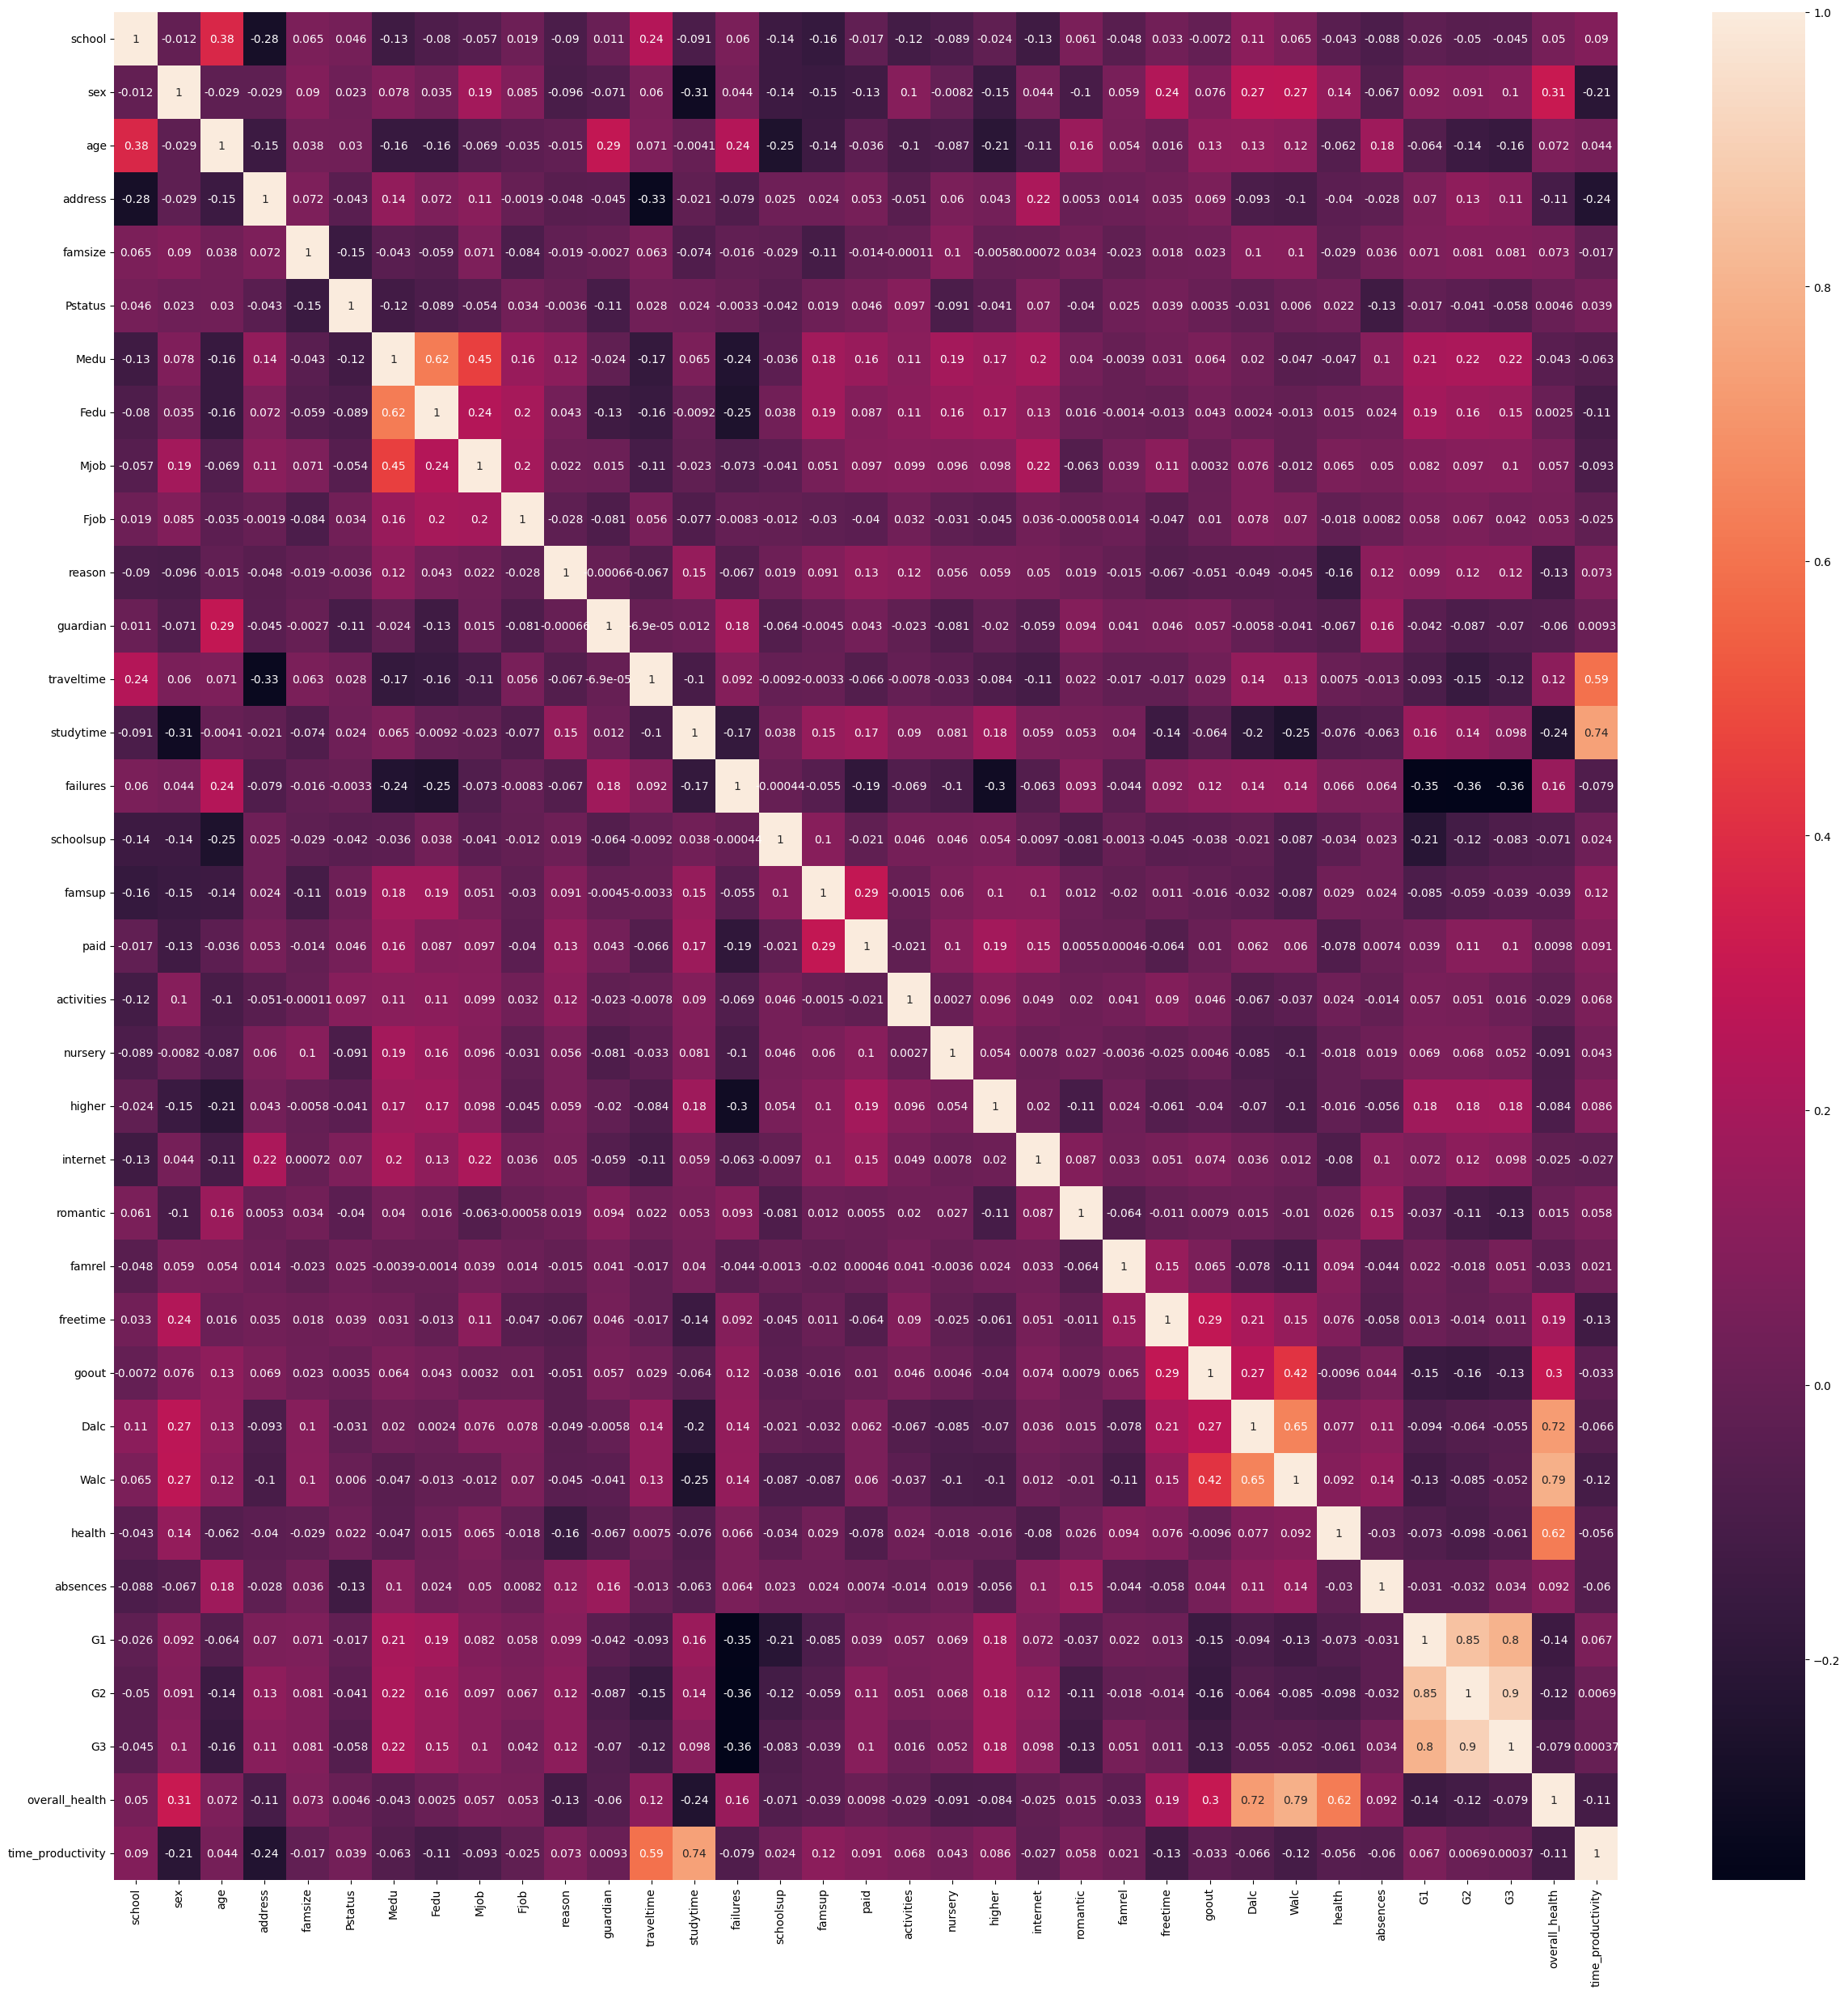

In [ ]:
cormap = df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(cormap, annot=True)
plt.show()

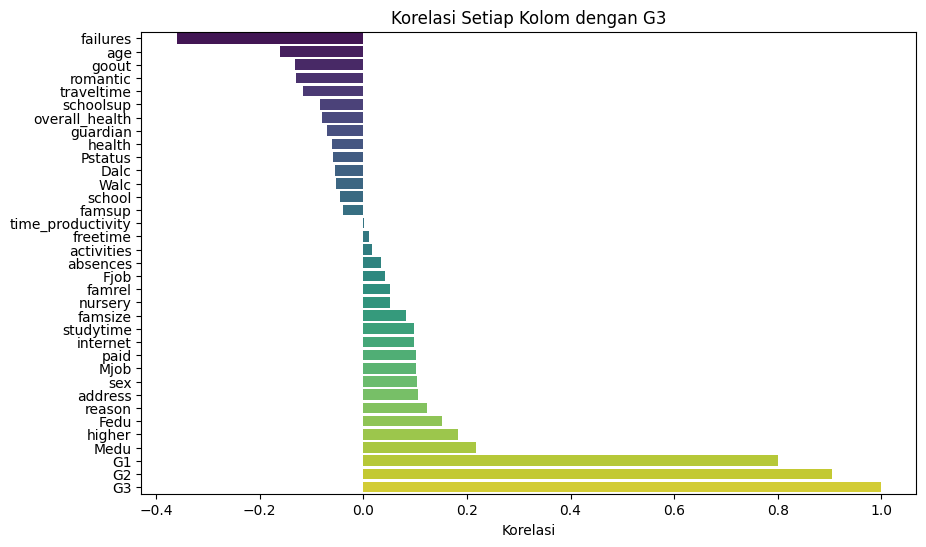

In [ ]:
target_column = 'G3'

# Menghitung nilai korelasi antara setiap kolom dengan 'target_column'
correlations = df.corr()[target_column].sort_values()

# Membuat barplot horizontal
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations, y=correlations.index, orient='h', palette='viridis')

# Menambahkan judul dan label
plt.title(f'Korelasi Setiap Kolom dengan {target_column}')
plt.xlabel('Korelasi')

# Menampilkan plot
plt.show()

In [ ]:
X = df.drop('G3', axis=1)
y = df['G3']

In [ ]:
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

#Feature Selection

In [ ]:
X = df.drop('G3', axis=1)
y = df['G3']

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
selector = SelectKBest(f_regression, k=3)
X_new = selector.fit_transform(X_scaled, y)
selector

SelectKBest(k=3, score_func=<function f_regression at 0x7a28fc983640>)

In [ ]:
X_new

array([[0.        , 0.125     , 0.31578947],
       [0.        , 0.125     , 0.26315789],
       [1.        , 0.25      , 0.42105263],
       ...,
       [1.        , 0.4375    , 0.42105263],
       [0.        , 0.5       , 0.63157895],
       [0.        , 0.3125    , 0.47368421]])

#Linear Regression dengan G1 dan G2

In [ ]:
pick = ['age', 'Medu', 'Fedu', 'reason',
        'traveltime', 'failures', 'higher',
        'romantic', 'goout', 'G1', 'G2' ,'G3']
df = df[pick]
df

,age,Medu,Fedu,reason,traveltime,failures,higher,romantic,goout,G1,G2,G3
0,18,4,4,0,2,0,1,0,4,5,6,6
1,17,1,1,0,1,0,1,0,3,5,5,6
2,15,1,1,2,1,3,1,0,2,7,8,10
3,15,4,2,1,1,0,1,1,2,15,14,15
4,16,3,3,1,1,0,1,0,2,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,0,1,2,1,0,4,9,9,9
391,17,3,1,0,2,0,1,0,5,14,16,16
392,21,1,1,0,1,3,1,0,3,10,8,7
393,18,3,2,0,3,0,1,0,1,11,12,10


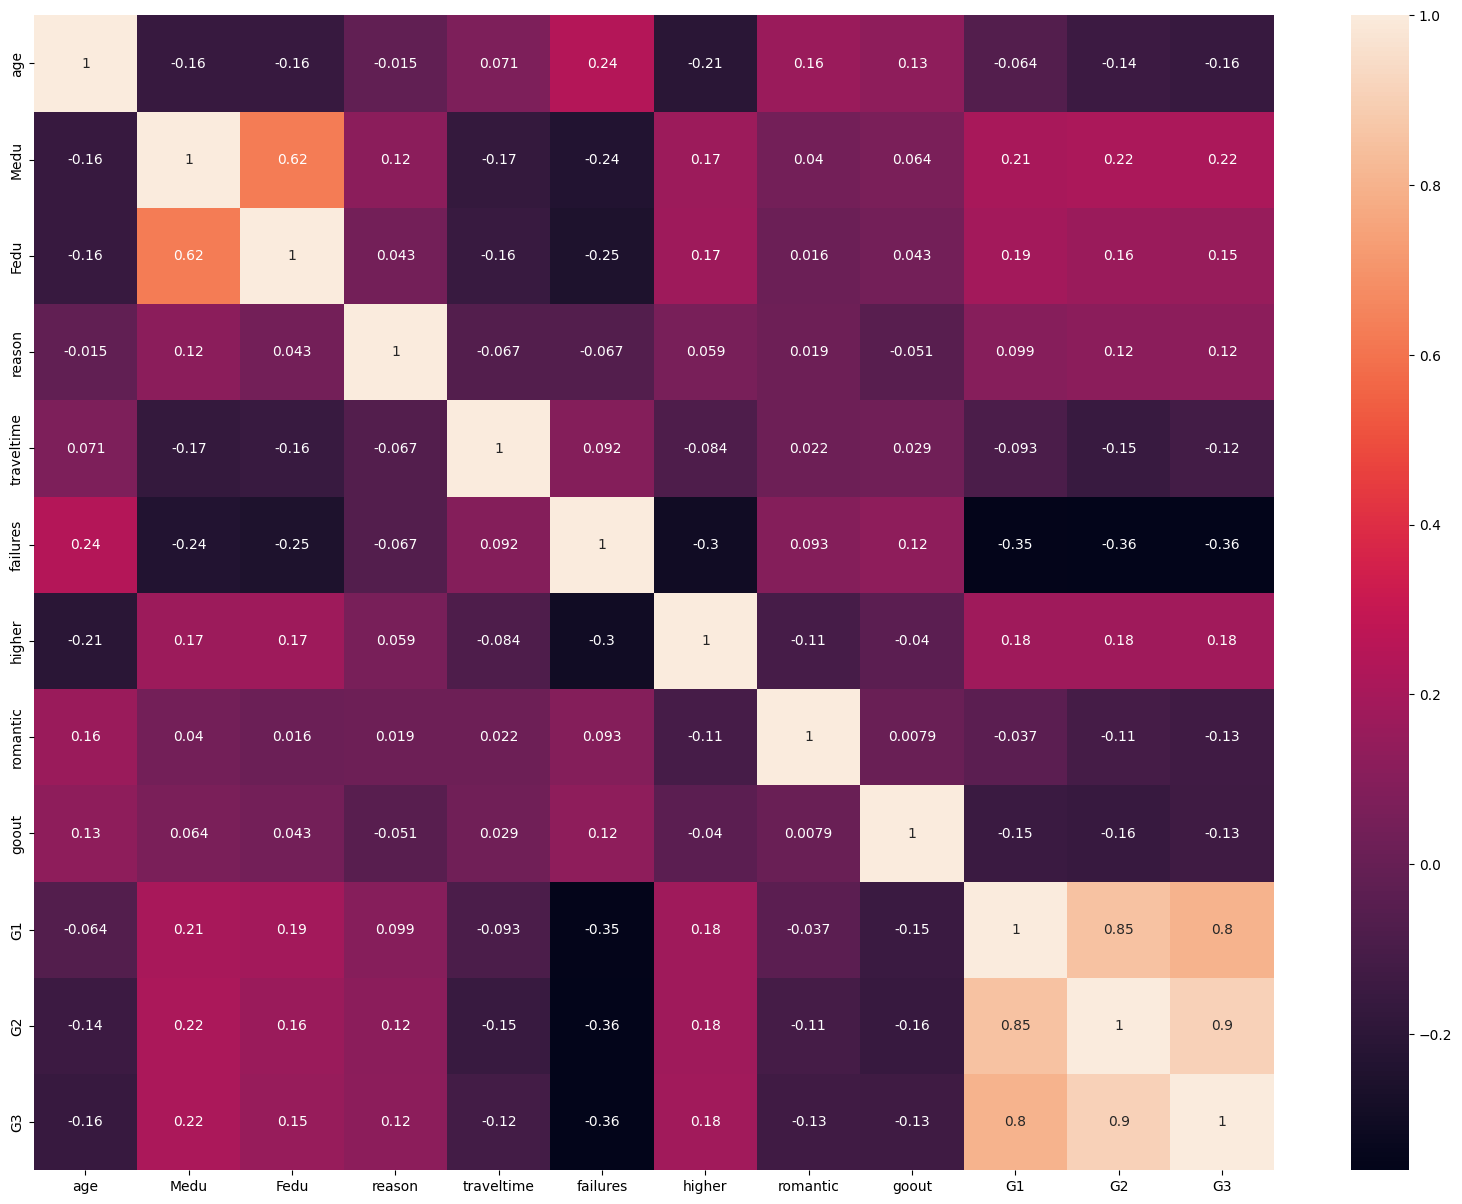

In [ ]:
cormap = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(cormap, annot=True)
plt.show()

##Train Test Data

In [ ]:
X = df.drop('G3', axis=1).values
y = df['G3'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((316, 11), (316,), (79, 11), (79,))

In [ ]:
pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [ ]:
# inisiasi algoritma
lin_reg = LinearRegression()

# Menggunakan Regresi Linear sederhana ke dalam data latih
lin_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [ ]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.9060510560354931
MSE: 2.174454777156011
RMSE: 1.4746032609336015
R2 Square 0.8876647495635095
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.2054640162366315
MSE: 4.003425750835606
RMSE: 2.000856254415995
R2 Square 0.8110191687752217
__________________________________


In [ ]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]],
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.906051,2.174455,1.474603,0.887665,0.811489


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['MAE']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'MAE'}, axis=1)
              .sort_values('MAE', ascending=True))
  xs = counted['MAE']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('MAE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MAE')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['MSE']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'MSE'}, axis=1)
              .sort_values('MSE', ascending=True))
  xs = counted['MSE']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('MSE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MSE')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['RMSE']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'RMSE'}, axis=1)
              .sort_values('RMSE', ascending=True))
  xs = counted['RMSE']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('RMSE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('RMSE')
_ = plt.ylabel('count()')

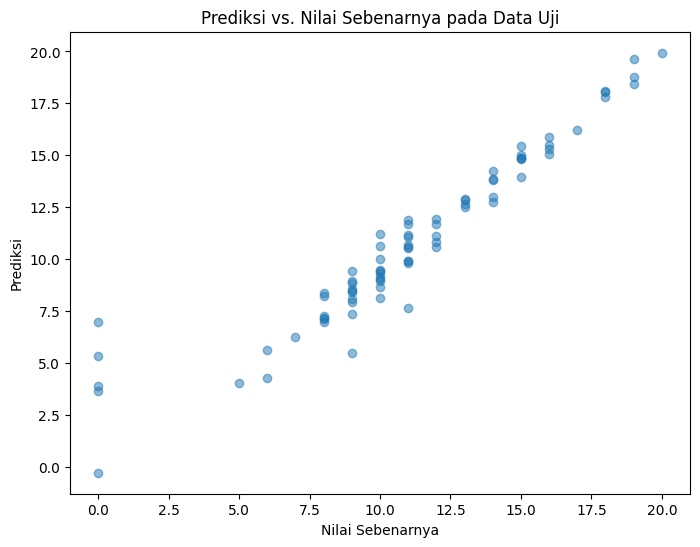

In [ ]:
import matplotlib.pyplot as plt

# Plot prediksi terhadap nilai sebenarnya pada data uji
plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_pred, alpha=0.5)
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Prediksi')
plt.title('Prediksi vs. Nilai Sebenarnya pada Data Uji')
plt.show()